In [1]:
import random
import numpy as np
import tensorflow as tf
import mlflow.keras

from ml_investing_wne import config
from ml_investing_wne.utils import get_logger
from ml_investing_wne.experiment_factory import create_asset, experiment_factory

random.seed(config.seed)
np.random.seed(config.seed)
tf.random.set_seed(config.seed)

2023-07-02 09:10:46.446749: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 09:10:47.844164: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

In [3]:
config.currency = 'BTCUSDT'
btc = create_asset()
experiment_btc = experiment_factory(btc).get_experiment()

In [4]:
config.currency = 'ETHUSDT'
eth = create_asset()
experiment_eth = experiment_factory(eth).get_experiment()

In [5]:
config.currency = 'SOLUSDT'
sol = create_asset()
experiment_sol = experiment_factory(sol).get_experiment()
experiment_sol.df.head(1)


,open,high,low,close,volume,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_15,EMA_15,VAR_15,SMA_20,EMA_20,VAR_20,SMA_50,EMA_50,VAR_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-11 10:05:00,2.8601,2.9048,2.8433,2.8618,1666.98,1.013348,2.88632,2.880008,0.001975,2.91697,2.902362,0.002034,2.925867,2.915245,0.001514,2.93289,2.925676,0.001365,2.983948,2.983948,0.008728,-0.03131,-0.005163,-0.026147,35.637422,33.234719,28.71698,5.892323,8.194001,-85.801995,2.806814,2.88632,2.965826,5.509175,0.345798,0.00414,10,1,0.398401,-0.917211,0.866025,0.5


In [6]:
config.currency = 'LTCUSDT'
ltc = create_asset()
experiment_ltc = experiment_factory(ltc).get_experiment()
experiment_ltc.df.head(1)

,open,high,low,close,volume,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_15,EMA_15,VAR_15,SMA_20,EMA_20,VAR_20,SMA_50,EMA_50,VAR_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 04:05:00,219.06,219.41,218.4,218.89,35.49974,0.998401,218.758,218.82787,0.23217,218.924,218.511717,0.444249,218.198667,218.149311,1.869212,217.2635,217.902885,4.294045,217.6806,217.6806,4.814283,0.512024,0.268896,0.243128,55.41919,56.652899,56.135192,63.146695,63.605696,-36.26943,217.896058,218.758,219.619942,0.788032,0.576571,-0.00237,4,0,0.887885,0.460065,0.0,1.0


In [7]:
config.currency = 'MATICUSDT'
matic = create_asset()
experiment_matic = experiment_factory(matic).get_experiment()
experiment_matic.df.head(1)

,open,high,low,close,volume,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_15,EMA_15,VAR_15,SMA_20,EMA_20,VAR_20,SMA_50,EMA_50,VAR_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-01 04:05:00,0.00413,0.00414,0.00412,0.00413,706777.8,1.0,0.004138,0.004139,3.200000e-10,0.004156,0.004167,8.266667e-10,0.004195,0.0042,4.498095e-09,0.004242,0.004232,1.041684e-08,0.004401,0.004401,2.351596e-08,-0.000084,-0.000003,-0.000081,21.338832,17.690571,14.160706,11.186371,8.805419,-87.5,0.004106,0.004138,0.00417,1.546641,0.375,0.0,4,2,0.887885,0.460065,0.866025,-0.5


In [4]:
experiment_btc.train_test_val_split()

In [9]:
experiment_eth.train_test_val_split()

: 

: 

In [12]:
experiment_sol.train_test_val_split()

In [13]:
experiment_ltc.train_test_val_split()

In [14]:
experiment_matic.train_test_val_split()

In [15]:
experiment_btc.X = np.concatenate([experiment_btc.X, experiment_sol.X, experiment_ltc.X,  experiment_eth.X, experiment_matic.X])
experiment_btc.X_val = np.concatenate([experiment_btc.X_val, experiment_sol.X_val, experiment_ltc.X_val, experiment_eth.X_val, experiment_matic.X_val])
experiment_btc.X_test = np.concatenate([experiment_btc.X_test, experiment_sol.X_test, experiment_ltc.X_test, experiment_eth.X_test, experiment_matic.X_test])

experiment_btc.y_cat = np.concatenate([experiment_btc.y_cat, experiment_sol.y_cat, experiment_ltc.y_cat,  experiment_eth.y_cat,  experiment_matic.y_cat])
experiment_btc.y_val_cat = np.concatenate([experiment_btc.y_val_cat, experiment_sol.y_val_cat, experiment_ltc.y_val_cat, experiment_eth.y_val_cat, experiment_matic.y_val_cat])
experiment_btc.y_test_cat = np.concatenate([experiment_btc.y_test_cat, experiment_sol.y_test_cat, experiment_ltc.y_test_cat, experiment_eth.y_test_cat, experiment_matic.y_test_cat])

experiment_btc.y_test = np.concatenate([experiment_btc.y_test, experiment_sol.y_test, experiment_ltc.y_test, experiment_eth.y_test, experiment_matic.y_test])


In [6]:
experiment_btc.X.shape

(34866, 96, 41)

In [7]:
experiment_btc.train_model()

2023/07/02 09:14:12 INFO mlflow.tracking.fluent: Experiment with name 'Binance_resnet_lstm_regularized_260min_1_96' does not exist. Creating a new experiment.
2023-07-02 09:14:12.206550: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 09:14:12.285219: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-02 09:14:12.285438: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1)

Epoch 1/100


2023-07-02 09:14:17.433261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-02 09:14:17.434682: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-02 09:14:17.435762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

ValueError: in user code:

    File "/home/ec2-user/SageMaker/.cs/conda/envs/codeserver_py39/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/ec2-user/SageMaker/.cs/conda/envs/codeserver_py39/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ec2-user/SageMaker/.cs/conda/envs/codeserver_py39/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/ec2-user/SageMaker/.cs/conda/envs/codeserver_py39/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/ec2-user/SageMaker/.cs/conda/envs/codeserver_py39/lib/python3.9/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/home/ec2-user/SageMaker/.cs/conda/envs/codeserver_py39/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/ec2-user/SageMaker/.cs/conda/envs/codeserver_py39/lib/python3.9/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/ec2-user/SageMaker/.cs/conda/envs/codeserver_py39/lib/python3.9/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/ec2-user/SageMaker/.cs/conda/envs/codeserver_py39/lib/python3.9/site-packages/keras/losses.py", line 2156, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/home/ec2-user/SageMaker/.cs/conda/envs/codeserver_py39/lib/python3.9/site-packages/keras/backend.py", line 5707, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 2)).


In [18]:
experiment_btc.evaluate_model()

299/299 [==============================] - 5s 16ms/step


ValueError: Length of values (9555) does not match length of index (1036)

In [19]:
from sklearn.metrics import precision_recall_curve

In [20]:
y_pred = experiment_btc.model.predict(experiment_btc.X_test)
y_pred_class = y_pred.argmax(axis=-1)
y_pred_class

299/299 [==============================] - 4s 15ms/step


array([1, 1, 1, ..., 1, 1, 0])

In [21]:
y_pred[:,1]

array([0.55378085, 0.71786207, 0.80974096, ..., 0.6250475 , 0.6113581 ,
       0.4997032 ], dtype=float32)

In [22]:
precision, recall, thresholds = precision_recall_curve(experiment_btc.y_test, y_pred[:,1])

In [23]:
precision[9500]

0.75

In [24]:
thresholds[9500]

0.80614424

Text(0.5, 1.0, 'Train Precision-Recall curve')

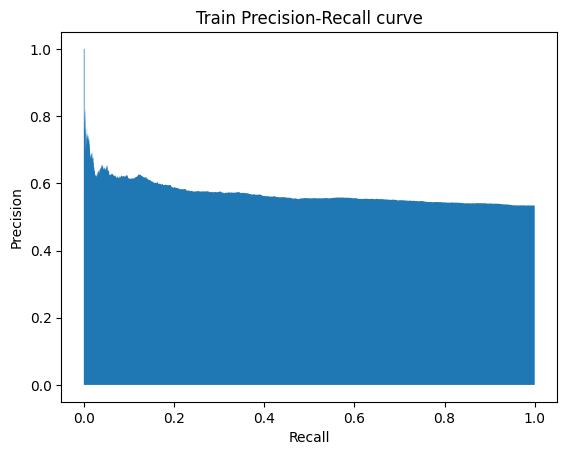

In [25]:
import matplotlib.pyplot as plt
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")